In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.metrics import r2_score

In [2]:
%matplotlib inline

In [3]:
ecopolitics = pd.read_csv("../data/homeless_count_Econ_Politics_by_state.csv")
ecopolitics.rename(columns={"state_abbrev": "state"},inplace=True)
ecopolitics

,year,state,homeless_count,win_party,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs
0,2008,AK,7462.0,Republican,48527.0,31586.0,47749.0,443538.0
1,2008,AL,23652.0,Republican,38138.0,20229.0,33353.0,2582591.0
2,2008,AR,14806.0,Republican,35310.0,18526.0,31940.0,1579283.0
3,2008,AZ,56146.0,Republican,43311.0,22318.0,35563.0,3402808.0
4,2008,CA,626632.0,Democrat,52524.0,28770.0,43890.0,20654292.0
...,...,...,...,...,...,...,...,...
103,2016,VT,5762.0,Democrat,44188.0,29569.0,50420.0,433924.0
104,2016,WA,103862.0,Republican,58989.0,34596.0,55802.0,4310119.0
105,2016,WI,27656.0,Republican,46551.0,30320.0,47598.0,3658030.0
106,2016,WV,7020.0,Republican,41183.0,20587.0,37099.0,890105.0


In [4]:
housingprice = pd.read_csv("../data/homeless_count_with_housing_price_by_state.csv")
housingprice.rename(columns={"Year_only": "year"},inplace=True)
housingprice

,year,state_abbrev,homeless_count,Sale_Prices,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
0,2008,AK,7462,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,AL,23652,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,AR,14806,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,AZ,56146,190750.000000,NaN,NaN,NaN,NaN,NaN
4,2008,CA,626632,314980.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
103,2016,VT,5762,NaN,152.405230,146.871426,140.774273,138.816947,121.721618
104,2016,WA,103862,294916.666667,270.179354,192.746052,174.273438,174.817988,183.988193
105,2016,WI,27656,163283.333333,139.400275,119.647646,119.108371,113.191737,98.356697
106,2016,WV,7020,140341.666667,111.100490,81.744695,90.590600,93.592909,89.201195


## Combine two dataframe

In [5]:
combined = pd.concat([ecopolitics, housingprice.drop(columns=['year', 'state_abbrev','homeless_count'])], axis=1, join="inner")
combined

,year,state,homeless_count,win_party,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs,Sale_Prices,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
0,2008,AK,7462.0,Republican,48527.0,31586.0,47749.0,443538.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,AL,23652.0,Republican,38138.0,20229.0,33353.0,2582591.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,AR,14806.0,Republican,35310.0,18526.0,31940.0,1579283.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,AZ,56146.0,Republican,43311.0,22318.0,35563.0,3402808.0,190750.000000,NaN,NaN,NaN,NaN,NaN
4,2008,CA,626632.0,Democrat,52524.0,28770.0,43890.0,20654292.0,314980.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2016,VT,5762.0,Democrat,44188.0,29569.0,50420.0,433924.0,NaN,152.405230,146.871426,140.774273,138.816947,121.721618
104,2016,WA,103862.0,Republican,58989.0,34596.0,55802.0,4310119.0,294916.666667,270.179354,192.746052,174.273438,174.817988,183.988193
105,2016,WI,27656.0,Republican,46551.0,30320.0,47598.0,3658030.0,163283.333333,139.400275,119.647646,119.108371,113.191737,98.356697
106,2016,WV,7020.0,Republican,41183.0,20587.0,37099.0,890105.0,140341.666667,111.100490,81.744695,90.590600,93.592909,89.201195


## EDA

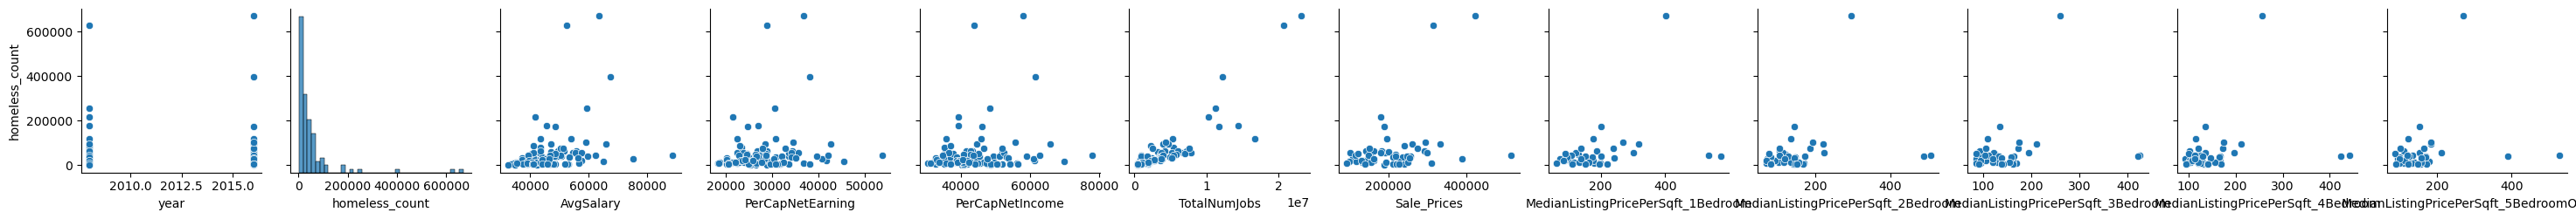

In [6]:
sns.pairplot(combined,y_vars=['homeless_count'])

## Preprocess data

In [7]:
# Categorical variables: state_abbrev (use one-hot encoding later)
enc = OrdinalEncoder()
# enc = OneHotEncoder(handle_unknown='ignore')
combined['state'] = enc.fit_transform(combined[['state']])

# Categorical variables: win_party
combined['win_party'] = [1 if i == 'Democrat' else 0 for i in combined['win_party']]

combined

,year,state,homeless_count,win_party,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs,Sale_Prices,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
0,2008,0.0,7462.0,0,48527.0,31586.0,47749.0,443538.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1.0,23652.0,0,38138.0,20229.0,33353.0,2582591.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,2.0,14806.0,0,35310.0,18526.0,31940.0,1579283.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,3.0,56146.0,0,43311.0,22318.0,35563.0,3402808.0,190750.000000,NaN,NaN,NaN,NaN,NaN
4,2008,4.0,626632.0,1,52524.0,28770.0,43890.0,20654292.0,314980.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2016,49.0,5762.0,1,44188.0,29569.0,50420.0,433924.0,NaN,152.405230,146.871426,140.774273,138.816947,121.721618
104,2016,50.0,103862.0,0,58989.0,34596.0,55802.0,4310119.0,294916.666667,270.179354,192.746052,174.273438,174.817988,183.988193
105,2016,51.0,27656.0,0,46551.0,30320.0,47598.0,3658030.0,163283.333333,139.400275,119.647646,119.108371,113.191737,98.356697
106,2016,52.0,7020.0,0,41183.0,20587.0,37099.0,890105.0,140341.666667,111.100490,81.744695,90.590600,93.592909,89.201195


In [8]:
# kNN imputer
knn_imp = KNNImputer(n_neighbors=5)
imputed = pd.DataFrame(knn_imp.fit_transform(combined))
imputed.columns = combined.columns
imputed

,year,state,homeless_count,win_party,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs,Sale_Prices,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
0,2008.0,0.0,7462.0,0.0,48527.0,31586.0,47749.0,443538.0,231598.000000,189.010261,155.750933,149.037258,148.869795,147.087177
1,2008.0,1.0,23652.0,0.0,38138.0,20229.0,33353.0,2582591.0,170557.666667,148.498418,124.463102,125.439907,132.672515,133.530986
2,2008.0,2.0,14806.0,0.0,35310.0,18526.0,31940.0,1579283.0,167393.333333,124.030313,93.902470,102.908534,114.327512,115.608925
3,2008.0,3.0,56146.0,0.0,43311.0,22318.0,35563.0,3402808.0,190750.000000,188.994777,156.591029,151.775536,152.915434,154.119572
4,2008.0,4.0,626632.0,1.0,52524.0,28770.0,43890.0,20654292.0,314980.000000,208.069261,158.420823,146.215846,152.430638,160.305918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2016.0,49.0,5762.0,1.0,44188.0,29569.0,50420.0,433924.0,231598.000000,152.405230,146.871426,140.774273,138.816947,121.721618
104,2016.0,50.0,103862.0,0.0,58989.0,34596.0,55802.0,4310119.0,294916.666667,270.179354,192.746052,174.273438,174.817988,183.988193
105,2016.0,51.0,27656.0,0.0,46551.0,30320.0,47598.0,3658030.0,163283.333333,139.400275,119.647646,119.108371,113.191737,98.356697
106,2016.0,52.0,7020.0,0.0,41183.0,20587.0,37099.0,890105.0,140341.666667,111.100490,81.744695,90.590600,93.592909,89.201195


## Baseline model

In [9]:
# exclude the state
imputed = imputed.drop(columns = "state")
imputed

,year,homeless_count,win_party,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs,Sale_Prices,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
0,2008.0,7462.0,0.0,48527.0,31586.0,47749.0,443538.0,231598.000000,189.010261,155.750933,149.037258,148.869795,147.087177
1,2008.0,23652.0,0.0,38138.0,20229.0,33353.0,2582591.0,170557.666667,148.498418,124.463102,125.439907,132.672515,133.530986
2,2008.0,14806.0,0.0,35310.0,18526.0,31940.0,1579283.0,167393.333333,124.030313,93.902470,102.908534,114.327512,115.608925
3,2008.0,56146.0,0.0,43311.0,22318.0,35563.0,3402808.0,190750.000000,188.994777,156.591029,151.775536,152.915434,154.119572
4,2008.0,626632.0,1.0,52524.0,28770.0,43890.0,20654292.0,314980.000000,208.069261,158.420823,146.215846,152.430638,160.305918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2016.0,5762.0,1.0,44188.0,29569.0,50420.0,433924.0,231598.000000,152.405230,146.871426,140.774273,138.816947,121.721618
104,2016.0,103862.0,0.0,58989.0,34596.0,55802.0,4310119.0,294916.666667,270.179354,192.746052,174.273438,174.817988,183.988193
105,2016.0,27656.0,0.0,46551.0,30320.0,47598.0,3658030.0,163283.333333,139.400275,119.647646,119.108371,113.191737,98.356697
106,2016.0,7020.0,0.0,41183.0,20587.0,37099.0,890105.0,140341.666667,111.100490,81.744695,90.590600,93.592909,89.201195


In [10]:
X = imputed.drop(columns='homeless_count')
y = imputed['homeless_count']

# Shuffle

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
list(X.columns)

['year',
 'win_party',
 'AvgSalary',
 'PerCapNetEarning',
 'PerCapNetIncome',
 'TotalNumJobs',
 'Sale_Prices',
 'MedianListingPricePerSqft_1Bedroom',
 'MedianListingPricePerSqft_2Bedroom',
 'MedianListingPricePerSqft_3Bedroom',
 'MedianListingPricePerSqft_4Bedroom',
 'MedianListingPricePerSqft_5BedroomOrMore']

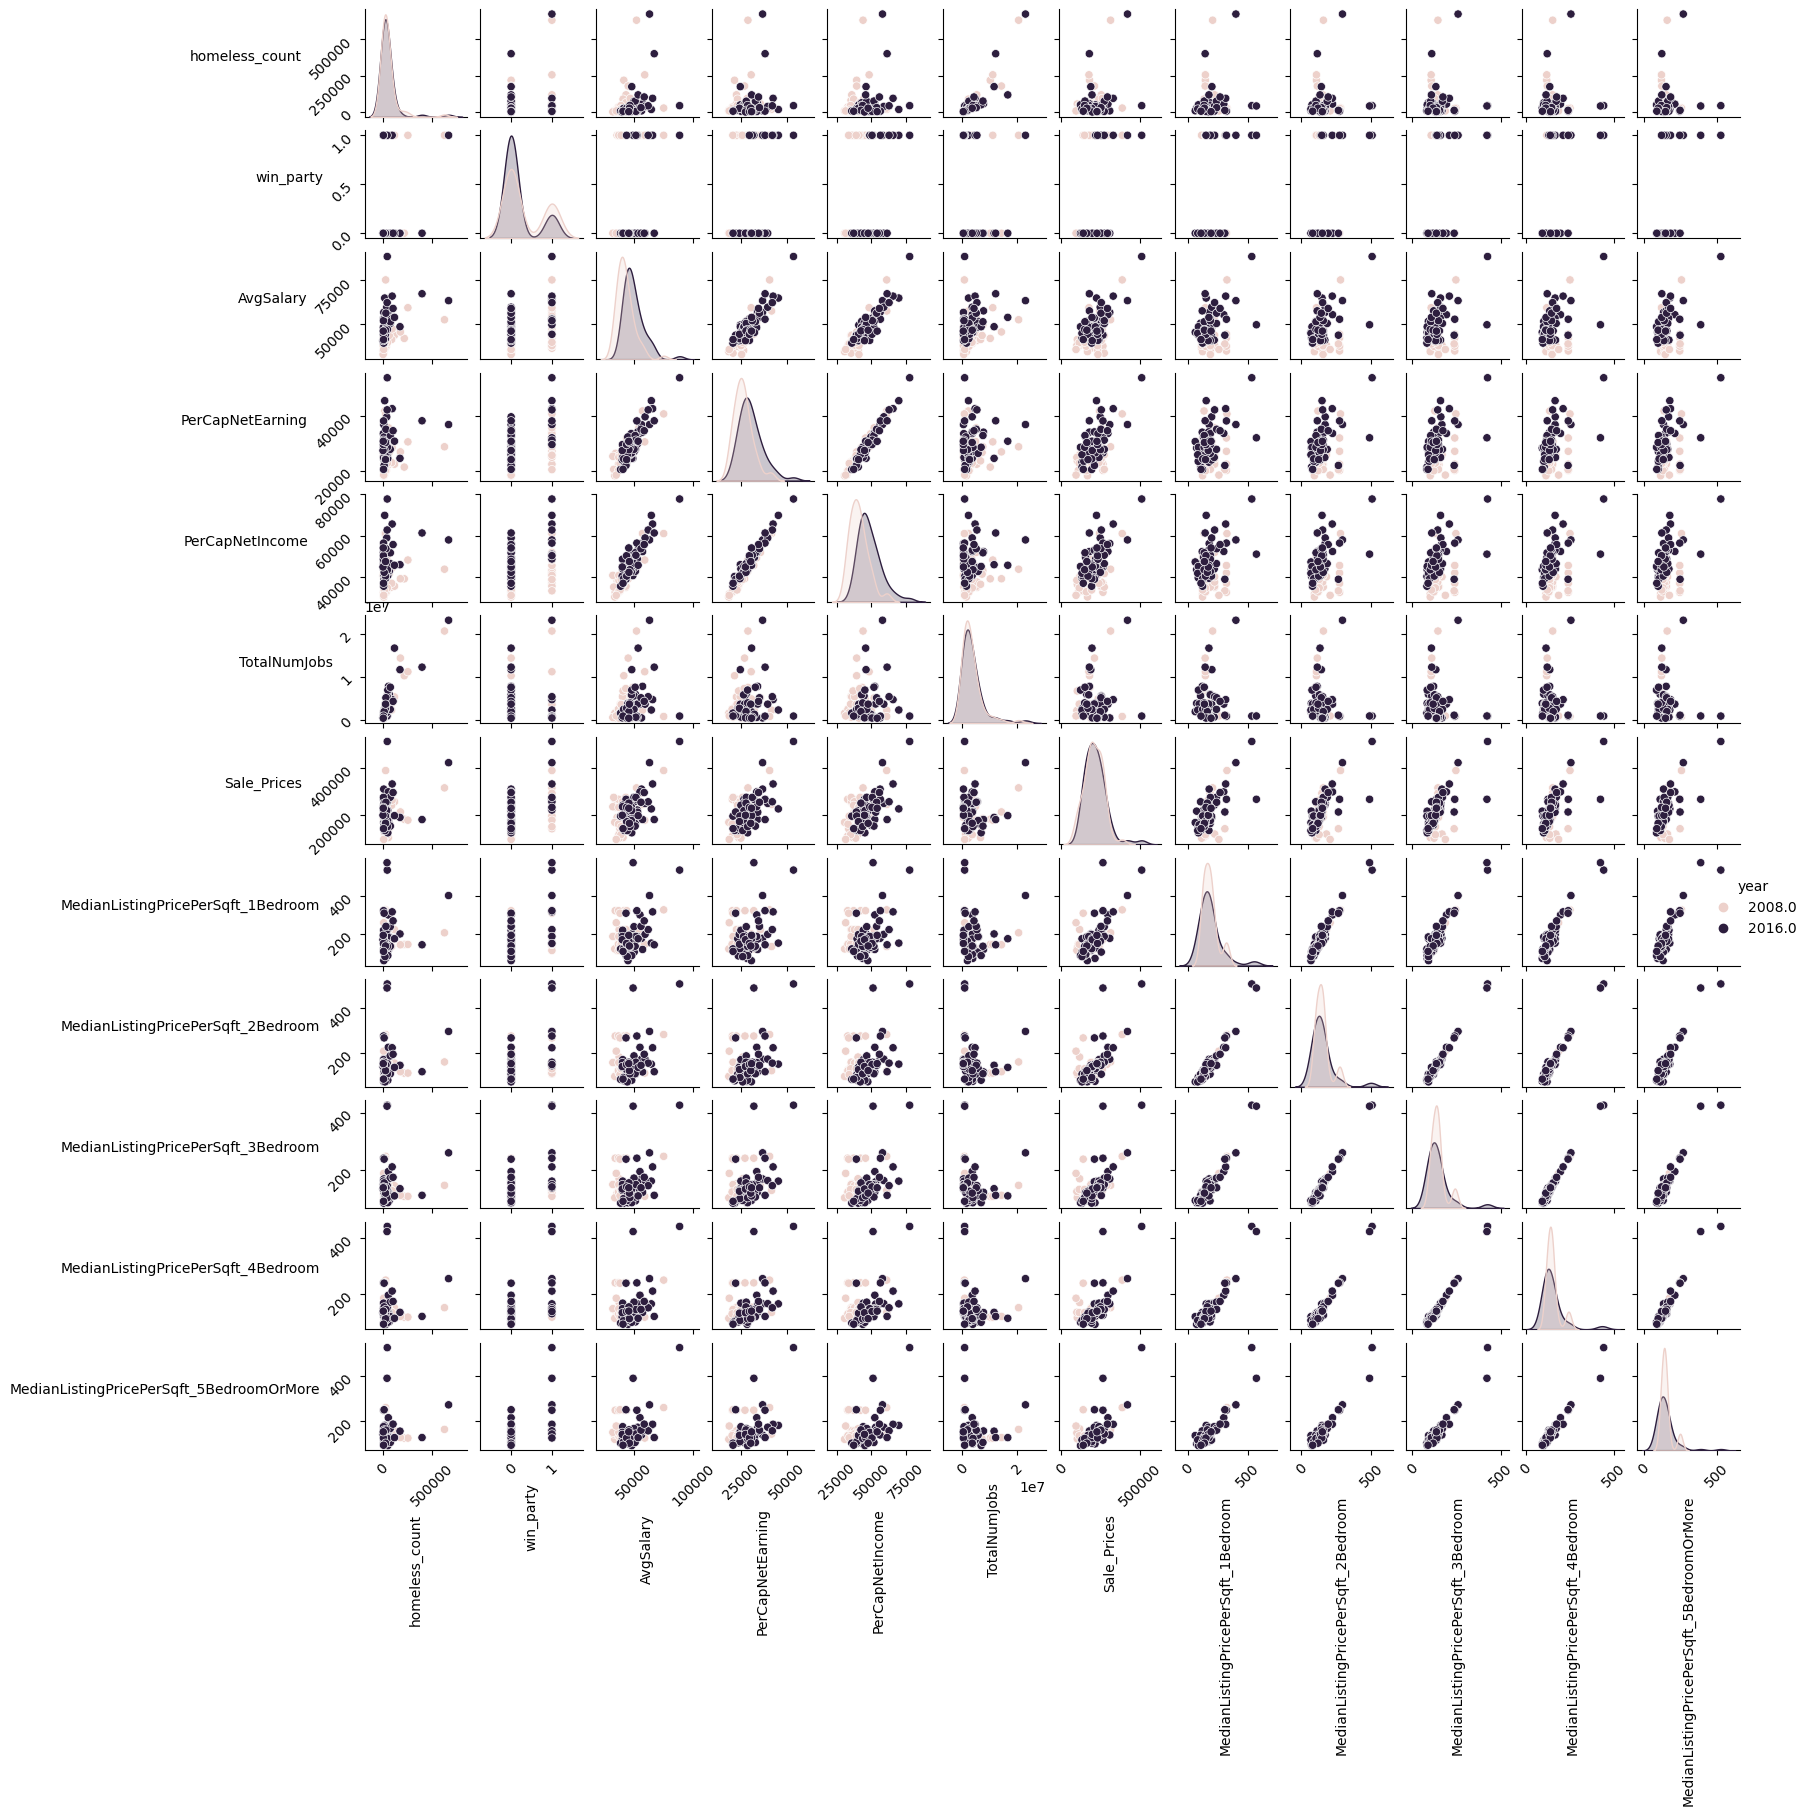

In [12]:
g=sns.pairplot(imputed, hue="year")
g.fig.set_size_inches(15,15)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')

In [13]:
predictor = 'TotalNumJobs'
baseline_linreg = LinearRegression().fit(X_train[predictor].values.reshape(-1,1), y_train)

In [14]:
#Predict
y_pred_train = baseline_linreg.predict(X_train[predictor].values.reshape(-1,1))
y_pred_test = baseline_linreg.predict(X_test[predictor].values.reshape(-1,1))

#Compute the MSE of the model
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
base_model_r2 = r2_score(y_test, y_pred_test)

print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        train_mse,
        test_mse,
    )
)

print(f"\tTest R-squared\t{base_model_r2:.4f}")

Linear regression model results:

	Train MSE	1778359802.2215
	Test MSE	4769299589.1060

	Test R-squared	0.4485


In [15]:
baseline_model_slope =baseline_linreg.coef_
baseline_model_intercept = baseline_linreg.intercept_

baseline_model_params = [baseline_linreg.intercept_, *baseline_linreg.coef_]
baseline_model_params_df = pd.DataFrame(baseline_model_params, columns = ["Coefficient"], index=["intercept"]+[str(i) for i in [predictor]])
baseline_model_params_df

,Coefficient
intercept,-29797.200220
TotalNumJobs,0.023964


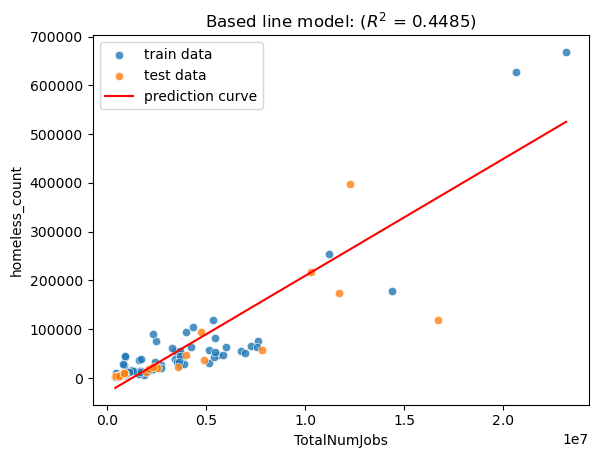

In [16]:
#Preliminary plotting
x_lin = np.linspace(min(X_train[predictor].values), max(X_train[predictor].values), 1000).reshape(-1, 1)

# split the x and y coords for plotting
pred_curve_y = [i*baseline_model_slope[0] + baseline_model_intercept for i in x_lin]

sns.scatterplot(data=imputed,x=X_train[predictor],y=y_train,alpha=0.8, label="train data")
sns.scatterplot(data=imputed,x=X_test[predictor],y=y_test,alpha=0.8, label="test data")
plt.plot(x_lin, pred_curve_y, label = f"prediction curve", c='red')
plt.title(f"Based line model: ($R^2$ = {base_model_r2:.4f})")
plt.legend();